## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils (1).py


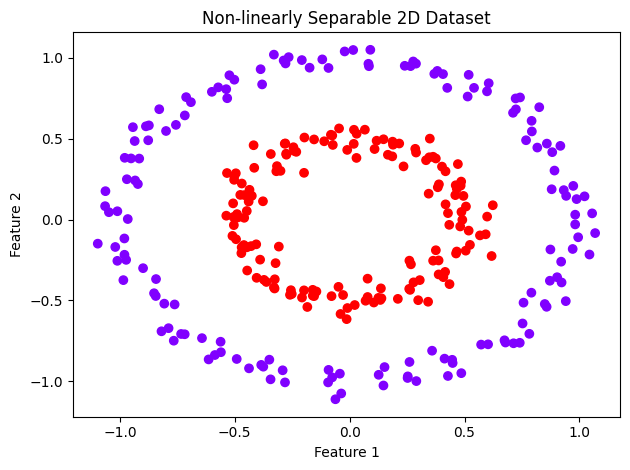

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Function to get consistent colors for plotting
def get_colors(y):
    # Map unique labels to colors
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: color for label, color in zip(unique_labels, colors)}
    return [color_map[label] for label in y]

cmap = get_colors(y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=cmap)
plt.title("Non-linearly Separable 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit.

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers.legacy import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
X_train.shape # Checking shape of training data

(240, 2)

In [ ]:
### YOUR CODE HERE ###
model = Sequential()
model.add(Dense(units=1, input_dim=2, activation='sigmoid'))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy".

In [ ]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
model.compile(loss="binary_crossentropy", optimizer=sgd)


Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, batch_size=16, epochs=300)

Epoch 1/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7520
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7510
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7498
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7485
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7471
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7462
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7447
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7436
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7423
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7411
Epoch 11/300
15/15 [==============================] - 0s 2ms/step - loss: 0.7401
Epoch 12/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7389
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by implementing your own function.

In [ ]:
y_preds = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [ ]:
y_preds.shape

(60, 1)

In [ ]:
y_pred_classes = (y_preds.reshape(y_preds.shape[0],) > 0.5).astype("int32") # Getting prediction classes from probabilities

In [ ]:
y_pred_classes.shape

(60,)

In [ ]:
y_test[:5]

array([0, 0, 1, 0, 0])

In [ ]:
### Build your own function to calculate accuracy###
def accuracy(y, y_preds):

  TP = np.sum((y_preds == 1) & (y == 1))
  FP = np.sum((y_preds == 1) & (y == 0))
  TN = np.sum((y_preds == 0) & (y == 0))
  FN = np.sum((y_preds == 0) & (y == 1))

  return (TP + TN)/(TP + FP + TN + FN)

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_pred_classes)}')

The accuracy is: 0.38333333333333336


57/57 [==============================] - 0s 1ms/step


Text(22.347222222222214, 0.5, 'Test')

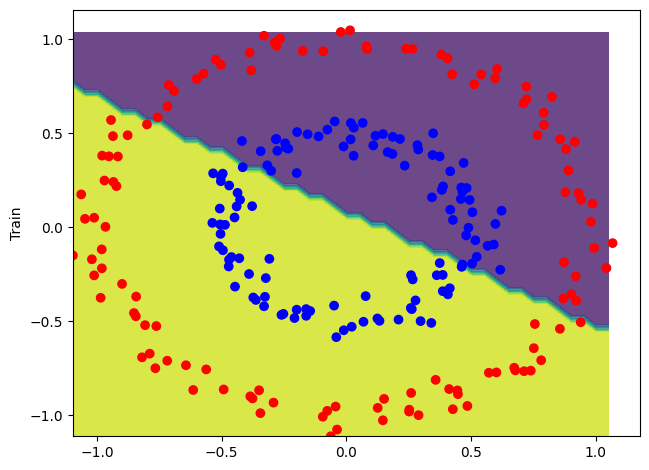

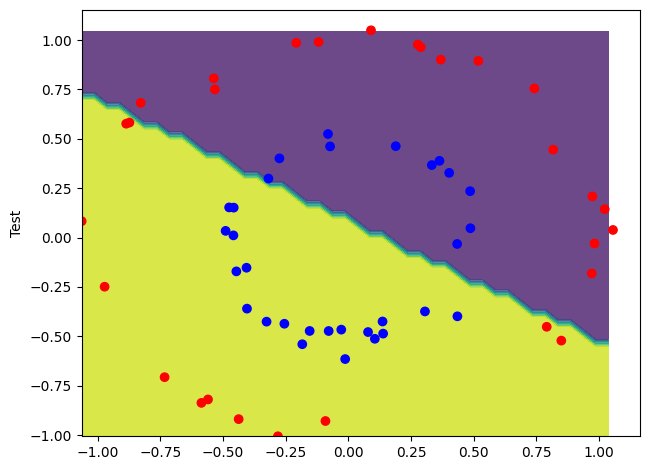

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer).

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers.legacy import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units
    model.add(Dense(units=2, input_dim=2, activation='relu'))

    # Add a final output layer with 1 unit
    model.add(Dense(units=1, activation='sigmoid'))

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate = 0.001, decay = 1e-7, momentum = .9)

    # compile the model with "binary_crossentropy" loss and SGD optimizer.
    model.compile(loss = "binary_crossentropy", optimizer = sgd)

    return model


In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, batch_size=16, epochs=300)

Epoch 1/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6708
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6704
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6699
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6693
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6688
Epoch 6/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6683
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6678
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6673
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6668
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6663
Epoch 11/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6660
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6655
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by using your own function.

In [ ]:
### YOUR CODE HERE ###
y_preds = model.predict(X_test)
y_pred_classes = (y_preds.reshape(y_preds.shape[0],) > 0.5).astype("int32")

2/2 [==============================] - 0s 6ms/step


In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_pred_classes)}')

The accuracy is: 0.7833333333333333


57/57 [==============================] - 0s 2ms/step


Text(22.347222222222214, 0.5, 'Test')

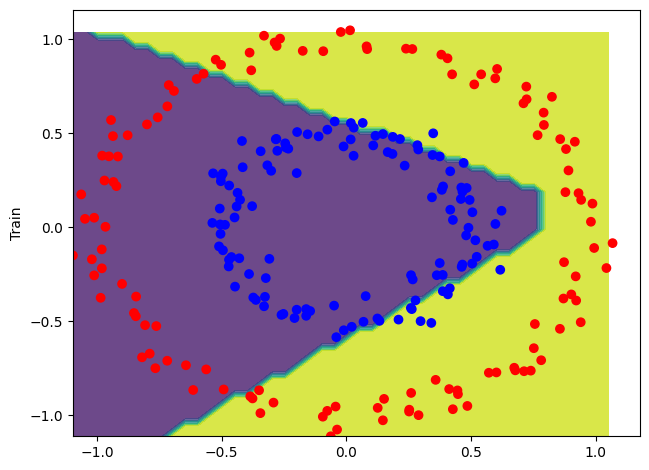

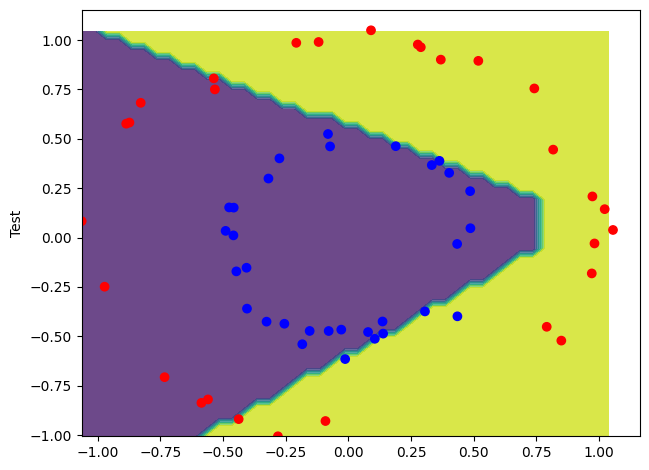

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding".

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]


In [ ]:
y_train_vectorized[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
y_train_vectorized[:5, 1]

array([0., 0., 1., 1., 0.], dtype=float32)

The one hot encoded vectors will serve as future labels for our models.

# Exercise 3:

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2.


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    model.add(Dense(units=10, input_dim=2, activation='relu'))
    model.add(Dense(units=5, activation='relu'))
    model.add(Dense(units=2, activation='softmax'))

    sgd = SGD(learning_rate = 0.001, decay = 1e-7, momentum = .9)

    model.compile(loss = "categorical_crossentropy", optimizer = sgd)

    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train_vectorized, batch_size=16, epochs=300)

Epoch 1/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6920
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6915
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6909
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6904
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6897
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6892
Epoch 7/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6885
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6882
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6872
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6867
Epoch 11/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6861
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6855
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by using your own function

In [ ]:
y_preds = model.predict(X_test)

y_preds[:5]

2/2 [==============================] - 0s 7ms/step


array([[0.952829  , 0.0471709 ],
       [0.9840376 , 0.01596237],
       [0.11958295, 0.8804169 ],
       [0.91228217, 0.08771784],
       [0.9454616 , 0.05453836]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_preds, axis=1)

y_pred_classes[:5]

array([0, 0, 1, 0, 0])

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_pred_classes)}')

The accuracy is: 1.0


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_classes)

1.0

57/57 [==============================] - 0s 1ms/step


Text(22.347222222222214, 0.5, 'Test')

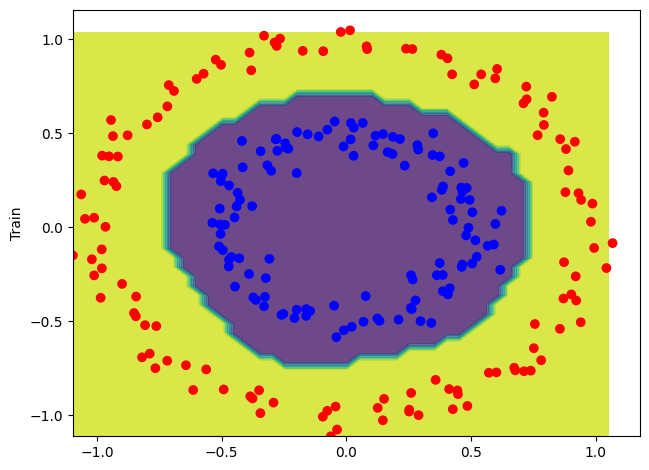

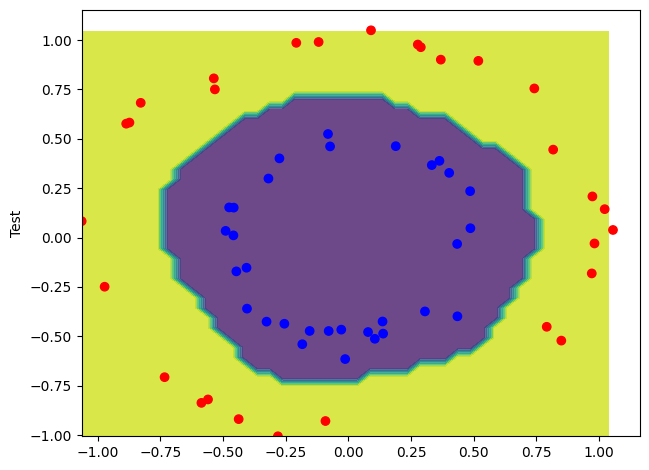

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions
\lb remove this

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans- If the learning rate is too high for full batch gradient descent (GD), the steps taken may be too large as a result of which the parameters can often overshoot the minimum. Because of this, gradient descent may just oscillate around the minimum, and sometimes even diverge which can increase the error instead of reducing it.

As Stochastic Gradient Descent (SGD) is based on making updates at each iteration based on just a few samples from the data, picking a very high learning rate can cause very erratic updates at each step due to which the parameters may vary wildly and lead to instability. This can cause a delay in the progress or even act as a barrier to the parameters for reaching the vicinity of the minimum.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans- One data augmentation method that can be helpful for classifying images of dogs and cats can be rotation of the images, even going to the extent of turning the images upside down. Changing the orientation can cause the algorithm to focus on the distinct features of dogs and cats rather than their orientation, which can lead to the model generalizing well on new images of dogs and cats, irrespective of the image orientation.

However, this method would not be too helpful for images of handwritten digits as there's usually a very specific way in which digits are written (typically upright), and rotating them may cause them to appear as other digits or not make any sense whatsoever.

Q3. Suppose we have the following two neural networks containing fully-connected layers only.
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans- As network A has a simpler architecture over network B, it's advantage is that it is less computationally expensive to train, and is less likely to overfit the training data due to less parameters (less variance) - this can help in generalizing better to datasets with mostly linear decision boundaries.

As network B has an additional hidden layer, it can capture more complex non-linear representations in the data and perform more complex transformations compared to network A. This can help fit the training data better and reduce the bias.


# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records.

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/>
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers.legacy import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
### YOUR CODE HERE ###
# Load your training data set
from google.colab import files
import io

uploaded = files.upload()

# Training data
df_training = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
# Split data into X (features) and y (target)
df_training_y = df_training['default.payment.next.month']
df_training_xs = df_training.drop('default.payment.next.month', axis=1)
# Please make sure y is in a one-hot representation


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()


# Training Dataset
# Selecting numerical data in training dataset
df_training_numerical = df_training_xs[df_training_xs.columns.difference(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])]

# Applying StandardScaler - training dataset
training_numerical_x_scaled = std_scaler.fit_transform(df_training_numerical)

# Convert to DataFrame
numerical_scaled_training_x_df = pd.DataFrame(training_numerical_x_scaled, columns=df_training_numerical.columns)


# Test Dataset
# Selecting numerical data in test dataset
df_test_numerical = df_test[df_test.columns.difference(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])]

# Applying StandardScaler
test_numerical_x_scaled = std_scaler.fit_transform(df_test_numerical)

# Convert to DataFrame
numerical_scaled_test_df = pd.DataFrame(test_numerical_x_scaled, columns=df_test_numerical.columns)


In [ ]:
# One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder

# Training dataset
# Selecting categorical data
categorical_data_training = df_training_xs[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse=False)
categorical_encoded_training = encoder.fit_transform(categorical_data_training)

# Convert to DataFrame
categorical_encoded_training_df = pd.DataFrame(categorical_encoded_training, columns=encoder.get_feature_names_out(categorical_data_training.columns))



# Test Dataset
# Selecting categorical data
categorical_data_test = df_test[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse=False)
categorical_encoded_test = encoder.fit_transform(categorical_data_test)

# Convert to DataFrame
categorical_encoded_test_df = pd.DataFrame(categorical_encoded_test, columns=encoder.get_feature_names_out(categorical_data_test.columns))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Merging into Combined dataframe

# Training Dataset
#Merge the training data to have everything on one place
categorical_encoded_training_df
numerical_scaled_training_x_df

# Resetting index to align the dataframes before combining
categorical_encoded_training_df.reset_index(drop=True, inplace=True)
numerical_scaled_training_x_df.reset_index(drop=True, inplace=True)

# Combining encoded categorical data and scaled numerical data
combined_df_x_training = pd.concat([numerical_scaled_training_x_df, categorical_encoded_training_df], axis=1)


# Test Dataset
#Merge the test data to have everything on one place
numerical_scaled_test_df
categorical_encoded_test_df

# Resetting index to align the dataframes before combining
categorical_encoded_test_df.reset_index(drop=True, inplace=True)
numerical_scaled_test_df.reset_index(drop=True, inplace=True)

# Combining encoded categorical data and scaled numerical data
combined_df_test = pd.concat([numerical_scaled_test_df, categorical_encoded_test_df], axis=1)

In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(combined_df_x_training, df_training_y, test_size=0.3, random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
# Print out the shape of X_train
X_train.shape

(2789, 82)

In [ ]:
X_val.shape # Shape of validation set (X_val)

(1196, 82)

In [ ]:
y_train.shape

(2789,)

In [ ]:
y_train_vectorized.shape

(2789, 2)

In [ ]:
y_val.shape

(1196,)

The dataset is highly imbalanced, as around 77% of the observations in the training set and 78% of the observations in the validation set are non-default.

In [ ]:
y_val.sum()/y_val.shape[0]

0.225752508361204

In [ ]:
y_train.sum()/y_train.shape[0]

0.23305844388669775

Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters.

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

# Procedure for selecting Neural Network Architecture

We followed a two-phase approach to select the most suitable neural network architecture:-

1. Focusing on improving predictions on training set by just considering dense layers
2. Adding in dropout layers to handle overfitting and improve fit on the validation set

### Phase 1 - Improving fit on training set

We went through a set of architectures, starting with fewer layers and then increasingly increasing the number of layers to fit the training data better. The foll. summary gives an idea about how the different arhitectures performed:-</br>

Training set Metrics (Precision, Recall, Accuracy, F1, AUC) in order</br>
- Architecture 1 (32, 16) - 0.68, 0.46, 0.83, 0.55, 0.83
- Architecture 2 (64, 32, 16) - 0.76, 0.48, 0.84, 0.59, 0.87
- Architecture 3 (128, 64, 32) -  0.81, 0.76, 0.90, 0.78, 0.95
- Architecture 4 - (256, 128, 64, 32) - 0.87, 0.86, 0.94, 0.87, 0.98
- Architecture 5 - (512, 256, 128, 64, 32) - 0.73, 0.96, 0.91, 0.83, 0.99

Based on these performances, we felt that Architecture 4 would be the most suitable as adding more layers beyond that did not have much effect on the training fit. </br>

### Phase 2 - Improving fit on validation set

To reduce overfitting and improve accuracy on validation set, we added dropout layers after each hidden layer, with different dropout rates. We found that a rdropout rate of 0.5 was the most suitable to optimize performance on validation set.</br>

Hence, our final model consists of 4 hidden layers with 256, 128, 64, and 32 neurons respectively, and dropout layers after each of these with a dropout rate of 0.5, followed by an output layer with softmax activation function.

In [ ]:
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(units=256, input_dim=82, activation='relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(rate=0.5))


    # Finally, add a readout layer
    model.add(Dense(units=2, activation='softmax'))

    ######################
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])


    return model

In [ ]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train_vectorized, batch_size=32, epochs=100)

Epoch 1/100
88/88 [==============================] - 1s 4ms/step - loss: 0.6480 - accuracy: 0.6780
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.7454
Epoch 3/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.7551
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5565 - accuracy: 0.7601
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5682 - accuracy: 0.7619
Epoch 6/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5540 - accuracy: 0.7648
Epoch 7/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5497 - accuracy: 0.7644
Epoch 8/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.7659
Epoch 9/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 0.7644
Epoch 10/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5424 - accuracy: 0.7648
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
def precision(y, y_preds): #TP/(TP+FP)

  TP = np.sum((y_preds == 1) & (y == 1))
  FP = np.sum((y_preds == 1) & (y == 0))
  TN = np.sum((y_preds == 0) & (y == 0))
  FN = np.sum((y_preds == 0) & (y == 1))

  return TP/(TP + FP)

def recall(y, y_preds): #TP/(TP+FN)

  TP = np.sum((y_preds == 1) & (y == 1))
  FP = np.sum((y_preds == 1) & (y == 0))
  TN = np.sum((y_preds == 0) & (y == 0))
  FN = np.sum((y_preds == 0) & (y == 1))

  return TP/(TP + FN)

def accuracy(y, y_preds): #(TP+TN)/(TP+TN+FP+FN)

  TP = np.sum((y_preds == 1) & (y == 1))
  FP = np.sum((y_preds == 1) & (y == 0))
  TN = np.sum((y_preds == 0) & (y == 0))
  FN = np.sum((y_preds == 0) & (y == 1))

  return (TP + TN)/(TP + FP + TN + FN)

def f1(y, y_preds): #2*(precision*recall)/(precision+recall)

  prec = precision(y, y_preds)
  rec = recall(y, y_preds)

  return (2 * prec * rec)/(prec + rec)

### Training Set Accuracy Metrics

In [ ]:
y_preds_train = model.predict(X_train)

y_preds_train.shape

88/88 [==============================] - 0s 2ms/step


(2789, 2)

In [ ]:
y_pred_train_classes = np.argmax(y_preds_train, axis=1)

y_pred_train_classes.shape

(2789,)

In [ ]:
print(f'The precision is: {precision(y_train, y_pred_train_classes)}')
print(f'The recall is: {recall(y_train, y_pred_train_classes)}')
print(f'The accuracy is: {accuracy(y_train, y_pred_train_classes)}')
print(f'The f1 score is: {f1(y_train, y_pred_train_classes)}')

The precision is: 0.6834532374100719
The recall is: 0.43846153846153846
The accuracy is: 0.8217999282897096
The f1 score is: 0.5342080599812559


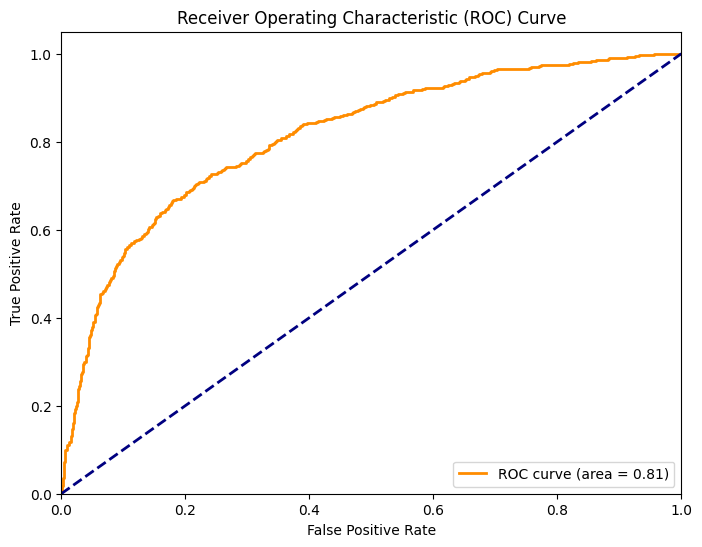

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
### WRITE CODE HERE
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred_train_proba = y_preds_train[:, 1]
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Validation Set Accuracy Metrics

In [ ]:
y_preds_val = model.predict(X_val)

y_preds_val.shape

38/38 [==============================] - 0s 2ms/step


(1196, 2)

In [ ]:
y_pred_val_classes = np.argmax(y_preds_val, axis=1)

y_pred_val_classes.shape

(1196,)

In [ ]:
print(f'The precision is: {precision(y_val, y_pred_val_classes)}')
print(f'The recall is: {recall(y_val, y_pred_val_classes)}')
print(f'The accuracy is: {accuracy(y_val, y_pred_val_classes)}')
print(f'The f1 score is: {f1(y_val, y_pred_val_classes)}')

The precision is: 0.6428571428571429
The recall is: 0.43333333333333335
The accuracy is: 0.8177257525083612
The f1 score is: 0.5176991150442477


Q5. Plot the ROC curve by giving appropriate names for title and axes.

AUC: 0.7714662826973842


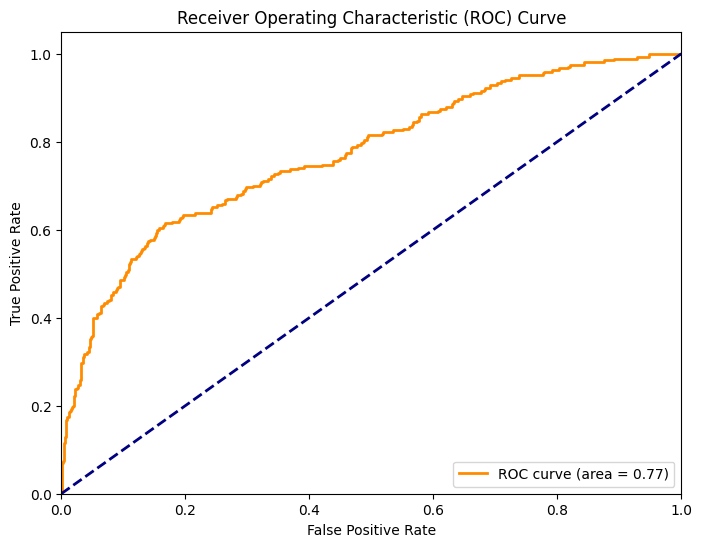

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
### WRITE CODE HERE
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred_val_proba = y_preds_val[:, 1]
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_val_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Is the accurancy value impressive for this dataset? Please explain based on the structure of this dataset.

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans- The dataset is highly imbalanced in the sense that only 23% of the observations in the training data and 22% of the observations in the test data correspond to defaults. Therefore, even a model that predicts 'no default' everytime will have an accuracy of around 78%. Based on that, the accuracy of 81.5% does not seem very impressive as it only performs slightly better than the trivial case of predicting 'no default' everytime. </br>

The five metrics are defined as follows:</br>
- **Precision:** It's a metric that measures the proportion of all observations classified as positive by the model that are actually true positives, i.e., Precision = TP / (TP + FP). A higher precision indicates that a model mostly classifies observations as positive when they are actually positive, and reduces the # of false positives (although this might be at the cost of a high # of false negatives). In this dataset, this corresponds to reducing the # of instances where model falsely predicts that someone would default when they do not actually default, but can also miss out cases of actual default.</br>

- **Recall:** It's a metric that measures the proportion of all observations belonging to positive class that are also classified by the model as positive, i.e., Recall = TP / (TP + FN). A higher recall indicates that a model mostly rarely misses out on positives, and reduces the # of false negatives (although this might be at the cost of a high # of false positives). In this dataset, this corresponds to reducing the # of instances where model falsely predicts that someone would not default when they actually default, but can also predict default when there's actually no default.</br>

- **Accuracy:** It's a metric that measures the proportion of observations that were assigned to the correct class by the model, i.e, Accuracy = (TP + TN) / (TP + TN + FP + FN). A higher accuracy means that more observations have the same predicted class as their actual class, and doesn't specifically focus on precision or recall. However, accuracy may be not be a suitable metric for very imbalanced classes as in such a case, a model will achieve high accuracy even if it assigns all observations to the majority class.

- **F1 Score:** It's a metric that gives importance to both precision and recall and tries to minimize both false positives and false negatives. It is the harmonic mean of precision and recall, i.e., F1 = 2 * (precision * recall) / (precision + recall). A high F1 score indicates that the model performs very well in assigning observations to their correct class, even in case of highly imbalanced classes.

- **AUC:** It is the area under the ROC curve (which plots True Positive Rate against True Negative Rate). It is a measure of separability of the classes, or how well the model is able to distinguish between the positive and negative classes across different thresholds. An AUC of 0.5 indicates that the model doesn't do any better than randomly selecting the positive or negative class, i.e., the probability of classifying an actually positive example as positive is 50%. A higher AUC indicates better model performance, or higher probability that an actually positive example would get assigned to positive class by the model.</br>


In our opinion, **F1 score** would be the best metric to focus on for this exercise. Accuracy would not be too suitable due to the imbalance in the classes. Recall may seem more suitable than precision as based on the use case, we would not want to miss out on any cases of default, but this might come at the cost of redcing the precision by a great extent (Ex - a model that predicts 'deafault' everytime will achieve a recall of 100%, but such a model is not very helpful in terms of making predictions). F1 score finds the right balance between precision and recall and makes sure that the model is not focusing explicitly on reducing FP or FN but reducing both.

#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
!pip install scikeras
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
# Build create_model function with activation function and learning rate of SGD as parameters
def create_model(learning_rate, activation):

    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate= learning_rate, decay=1e-7, momentum=.9)

    # Create your neural network model
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.

    ### WRITE CODE HERE
    model.add(Dense(units=256, input_dim=82, activation=activation))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=128, activation=activation))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=64, activation=activation))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=32, activation=activation))
    model.add(Dropout(rate=0.5))

    model.add(Dense(units=2, activation='softmax'))


    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE
param_dict =dict(
    model__activation = ['relu', 'tanh'],
    batch_size = [16, 32, 64],
    epochs = [100, 200, 500],
    model__learning_rate = [0.01, 0.001, 0.0001]
)

Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search.

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [43]:
### WRITE CODE HERE
random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_dict,
                                   cv = 5)

In [44]:
random_search_results = random_search.fit(X_train, y_train_vectorized) # it may take several hours.

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Q8. Print the best model parameters

In [45]:
### WRITE CODE HERE
random_search_results.best_params_

{'model__learning_rate': 0.001,
 'model__activation': 'tanh',
 'epochs': 200,
 'batch_size': 16}

Q9. Fit the model with the Best Parameter Set

In [51]:
### WRITE CODE HERE
best_model = create_model(learning_rate=0.001, activation='tanh')
best_model.fit(X_train, y_train_vectorized, batch_size=16, epochs=200)

Epoch 1/200
175/175 [==============================] - 3s 9ms/step - loss: 0.6971 - accuracy: 0.6795
Epoch 2/200
175/175 [==============================] - 2s 12ms/step - loss: 0.5794 - accuracy: 0.7440
Epoch 3/200
175/175 [==============================] - 2s 10ms/step - loss: 0.5421 - accuracy: 0.7605
Epoch 4/200
175/175 [==============================] - 1s 7ms/step - loss: 0.5032 - accuracy: 0.7763
Epoch 5/200
175/175 [==============================] - 2s 10ms/step - loss: 0.5018 - accuracy: 0.7888
Epoch 6/200
175/175 [==============================] - 1s 8ms/step - loss: 0.4907 - accuracy: 0.7845
Epoch 7/200
175/175 [==============================] - 1s 6ms/step - loss: 0.4849 - accuracy: 0.7895
Epoch 8/200
175/175 [==============================] - 1s 6ms/step - loss: 0.4740 - accuracy: 0.7942
Epoch 9/200
175/175 [==============================] - 1s 6ms/step - loss: 0.4719 - accuracy: 0.8028
Epoch 10/200
175/175 [==============================] - 1s 6ms/step - loss: 0.4728 - acc

Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [52]:
### WRITE CODE HERE
y_preds_val = best_model.predict(X_val)
y_pred_val_classes = np.argmax(y_preds_val, axis=1)

print(f'The precision is: {precision(y_val, y_pred_val_classes)}')
print(f'The recall is: {recall(y_val, y_pred_val_classes)}')
print(f'The accuracy is: {accuracy(y_val, y_pred_val_classes)}')
print(f'The f1 score is: {f1(y_val, y_pred_val_classes)}')

38/38 [==============================] - 0s 3ms/step
The precision is: 0.5714285714285714
The recall is: 0.5185185185185185
The accuracy is: 0.8035117056856187
The f1 score is: 0.5436893203883496


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans- We get a better F1-score in this model than the first NN model we built at the start of exercise 5, indicating that this model has a better balance of minimizing both false positives and false negatives. The recall value is also higher in this case. However, precision and accuracy are lower than the original model. However, we believe tjis model does a better job of distinguishing between the classes.

### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.1, 0.3, 0.5, 0.8, 1],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers that support both l1 and l2 penalties
}

In [ ]:
grid_search = GridSearchCV(lr, param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
grid_search.best_params_

{'C': 0.8, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###

    model = LogisticRegression(C=0.8, penalty='l1', solver='liblinear')

    model.fit(X_train, y_train)

    ######################
    return model# Return a logistic model with the best parameters you found

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###
best_lr = logistic_regression_model(X_train, y_train)

y_val_preds = best_lr.predict(X_val)

print(f'The precision is: {precision(y_val, y_val_preds)}')
print(f'The recall is: {recall(y_val, y_val_preds)}')
print(f'The accuracy is: {accuracy(y_val, y_val_preds)}')
print(f'The f1 score is: {f1(y_val, y_val_preds)}')

The precision is: 0.6685714285714286
The recall is: 0.43333333333333335
The accuracy is: 0.8235785953177257
The f1 score is: 0.5258426966292136


Q13. Plot the ROC curve by giving appropriate names for title and axes.

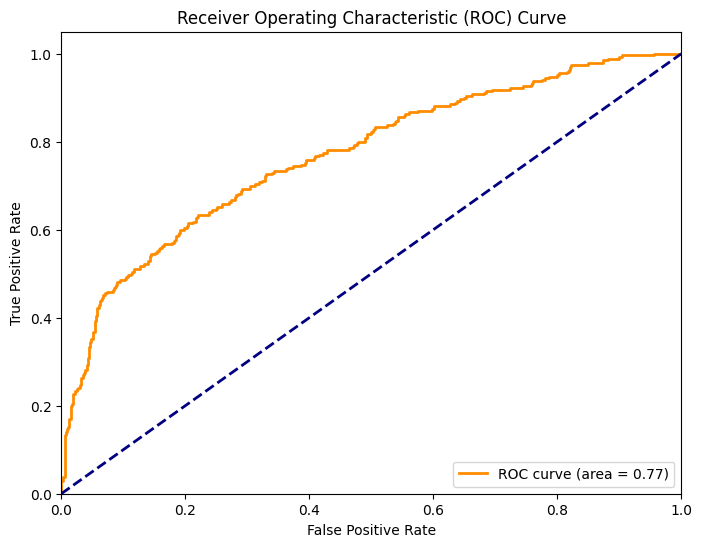

In [ ]:
### WRITE CODE HERE
y_pred_proba = best_lr.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(random_state=26)

In [55]:
param_grid = {
    'max_depth': [1, 3, 6, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [25, 100, 200]
}

In [56]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=26), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 6, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [25, 100, 200]},
             verbose=2)

In [57]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 200}

In [58]:
grid_search.best_score_

0.8128292246610425

In [59]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=8,
                                n_estimators=200,random_state=26) # Please set the random state to be 26
    ### YOUR CODE HERE ###
    rf.fit(X_train, y_train)

    return rf# Return a logistic model with the best parameters you found and random_state=26

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [60]:
### WRITE CODE HERE
best_rf = random_forest_model(X_train, y_train)

y_val_preds = best_rf.predict(X_val)

print(f'The precision is: {precision(y_val, y_val_preds)}')
print(f'The recall is: {recall(y_val, y_val_preds)}')
print(f'The accuracy is: {accuracy(y_val, y_val_preds)}')
print(f'The f1 score is: {f1(y_val, y_val_preds)}')

The precision is: 0.6237113402061856
The recall is: 0.44814814814814813
The accuracy is: 0.81438127090301
The f1 score is: 0.5215517241379309


Q16. Plot the ROC curve by giving appropriate names for title and axes.

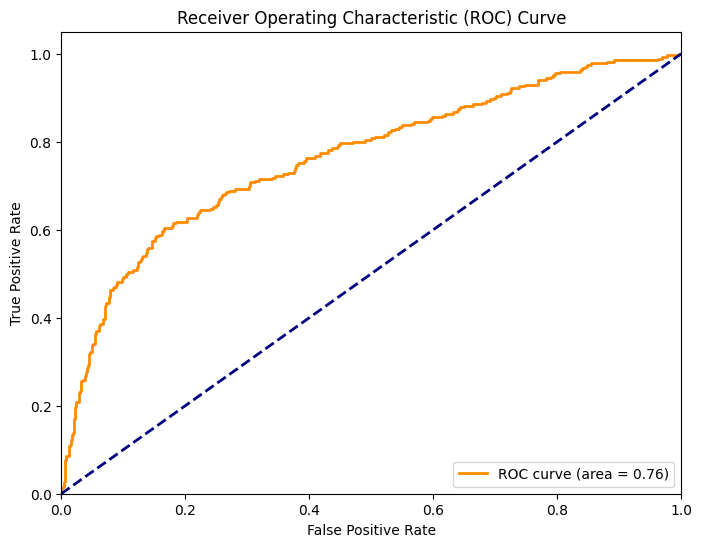

In [61]:
y_pred_proba = best_rf.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?

As per out chosen metric (F1 score), the neural network has the best performance. However, the performance of the models are fairly similar with regards to accuracy. As the neural network is more flexible, it is able to identify representations in the data that might be too complex for logistic regression and random forests. Logistic regression is the simplest of the models, but still performs fairly well as it is able to capture the basic features of the data without being prone to overfitting. The random forest uses aggregation and bootstrapping to enhance the performnce of many weak learners so that they do well collectively. </br>

However, Neural network performs the best due to its ability to learn complex representations and perform complex non-linear transformations.



Using the best of the above 3 models, obtain predictions for the test set.

In [63]:
from tensorflow.keras.utils import to_categorical

df_training_y_vectorized = to_categorical(df_training_y)

In [64]:
# Fitting the neural network based on tuned hyperparameters on the entire training set.
final_model = create_model(learning_rate=0.001, activation='tanh')

final_model.fit(combined_df_x_training, df_training_y_vectorized, batch_size=16, epochs=200)

Epoch 1/200
250/250 [==============================] - 2s 6ms/step - loss: 0.6224 - accuracy: 0.6994
Epoch 2/200
250/250 [==============================] - 1s 6ms/step - loss: 0.5269 - accuracy: 0.7629
Epoch 3/200
250/250 [==============================] - 1s 6ms/step - loss: 0.5035 - accuracy: 0.7772
Epoch 4/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4859 - accuracy: 0.7917
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4763 - accuracy: 0.7947
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4719 - accuracy: 0.7957
Epoch 7/200
250/250 [==============================] - 2s 6ms/step - loss: 0.4739 - accuracy: 0.7985
Epoch 8/200
250/250 [==============================] - 2s 7ms/step - loss: 0.4656 - accuracy: 0.8043
Epoch 9/200
250/250 [==============================] - 1s 6ms/step - loss: 0.4601 - accuracy: 0.8038
Epoch 10/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4631 - accura

In [66]:
# Checking if no. of columns in training and test set match
print(combined_df_test.shape[1] == combined_df_x_training.shape[1])

False


In [67]:
# Function to add columns in test set (with all values set to 0 if they are present in training set but not in test set)
def checking_columns(df1, df2):
  for column in df1.columns:
      # Check if the column is missing in df2
      if column not in df2.columns:
          # Find the position of the column in df1
          position = df1.columns.get_loc(column)
          # Add the missing column to df2 with values set to 0 in the same position
          df2.insert(position, column, 0)

In [68]:
# Using the function defined above to make the # of columns consistent in training and test set.
checking_columns(combined_df_x_training, combined_df_test)

In [69]:
# Checking if no. of columns in training and test set match now
print(combined_df_test.shape[1] == combined_df_x_training.shape[1])

True


In [70]:
### YOUR CODE HERE ###
y_pred_probs = final_model.predict(combined_df_test) # Softmax output on test set
y_pred = np.argmax(y_pred_probs, axis=1) # Converting to final binary predictions

32/32 [==============================] - 0s 2ms/step




---

